# Validate Custom Model
By default, While we train our model it validates itself using the VAL dataset as there is a default parameter called 'val=True', so there is no need to revalidate it again

In [11]:
from ultralytics import YOLO
model = YOLO("02_model_training/runs/detect/train2/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP75: {metrics.box.map75:.4f}")
print(f"Category-wise mAP50-95: {metrics.box.maps}")

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3911MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/katomaran/Downloads/Boasch/Final/02_model_training/dataset/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


                   all         20        392      0.684      0.254      0.275      0.196
                person         11         49      0.719      0.245      0.323      0.163
                 rider          2          2          1          0          0          0
                   car         20        202      0.543      0.579      0.593      0.343
                 truck          5         10      0.781      0.362      0.383      0.261
                   bus          1          1      0.509          1      0.995      0.895
                 motor          2          2          1          0          0          0
                  bike          1          1          1          0          0          0
         traffic light         12         54      0.203     0.0185     0.0519     0.0215
          traffic sign         15         71      0.403     0.0845      0.133     0.0758
Speed: 2.4ms preprocess, 3.7ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect

# Results

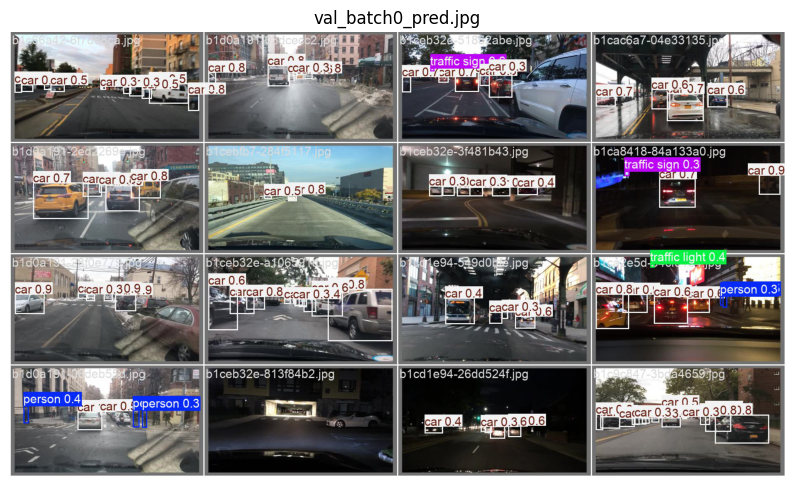

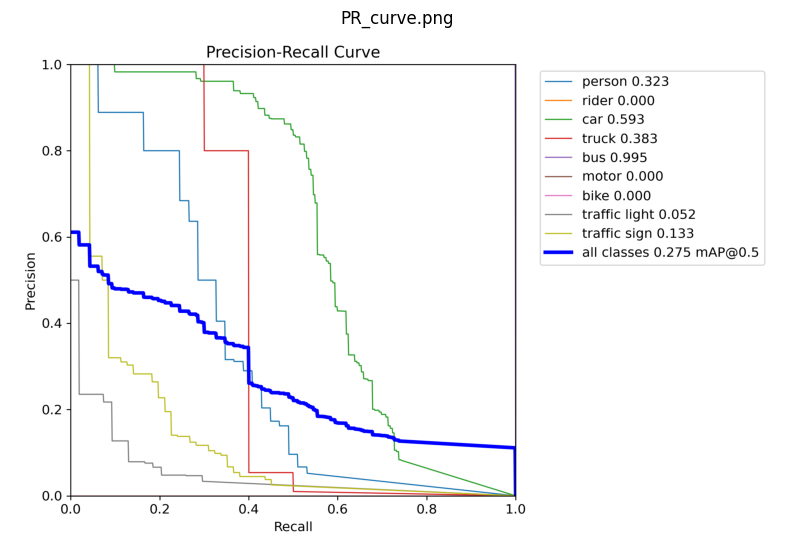

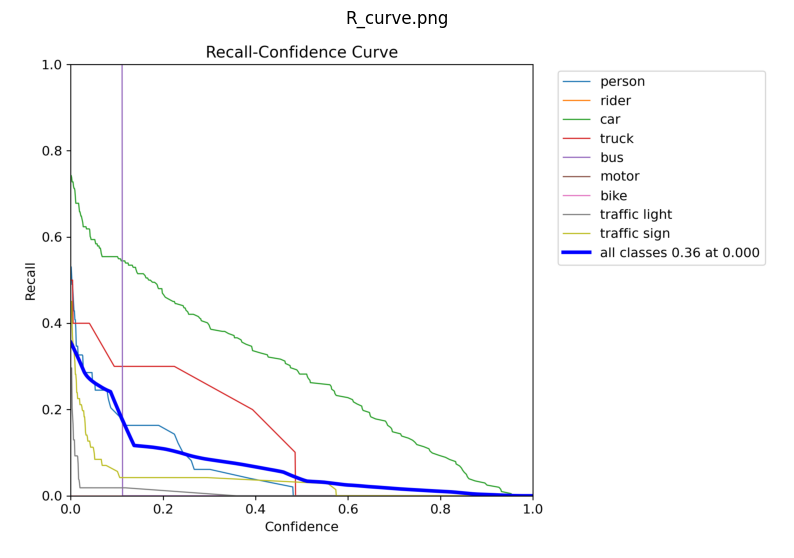

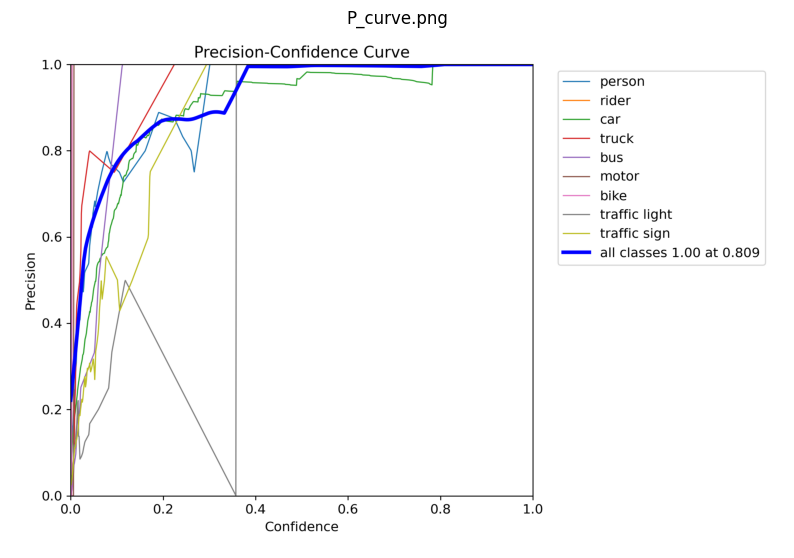

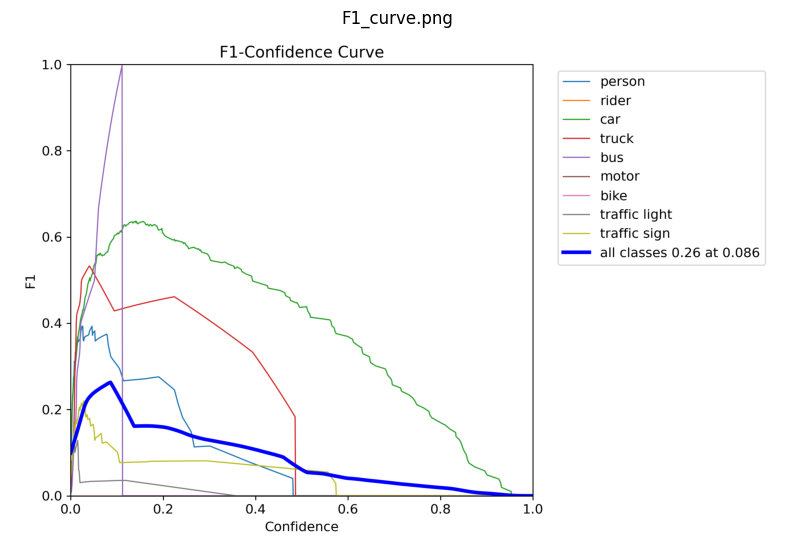

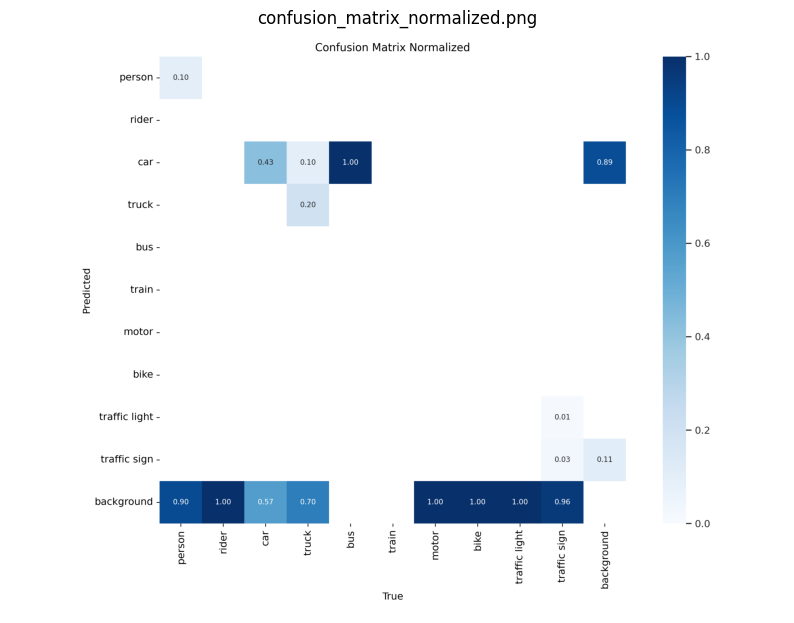

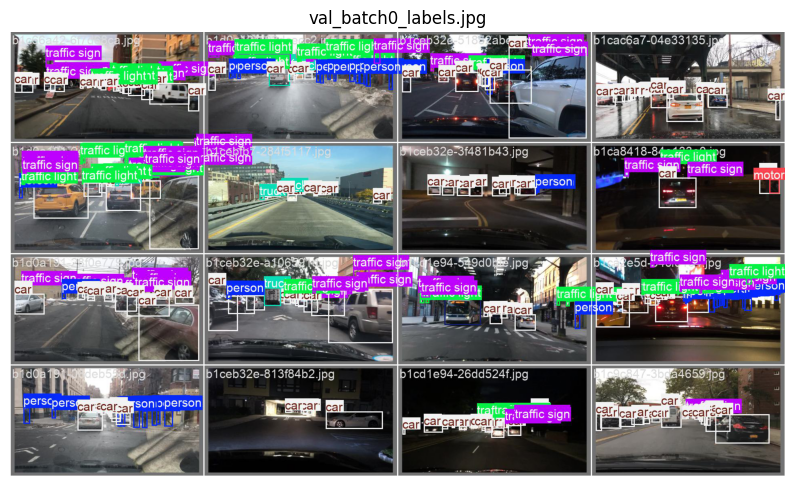

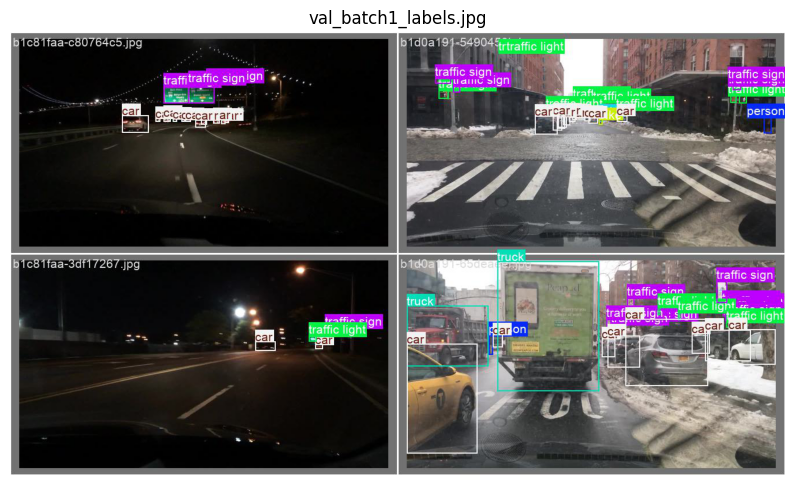

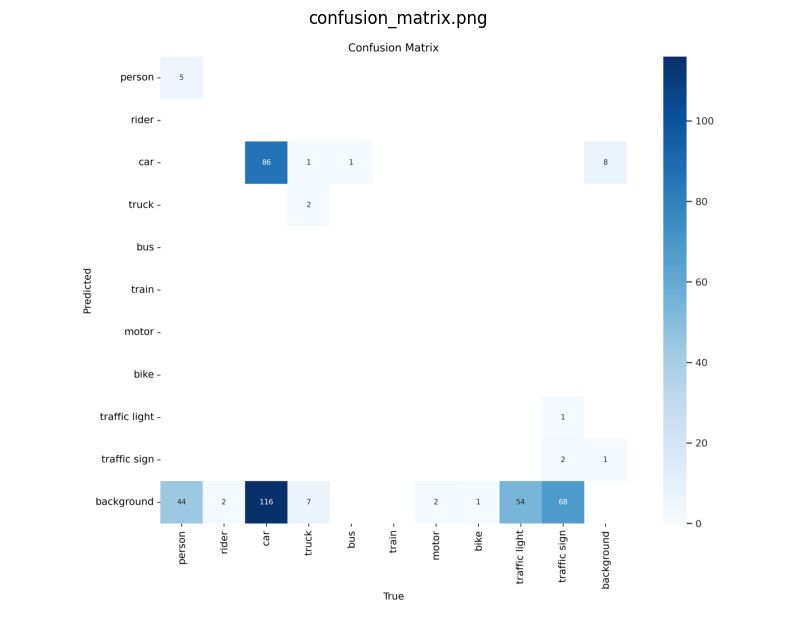

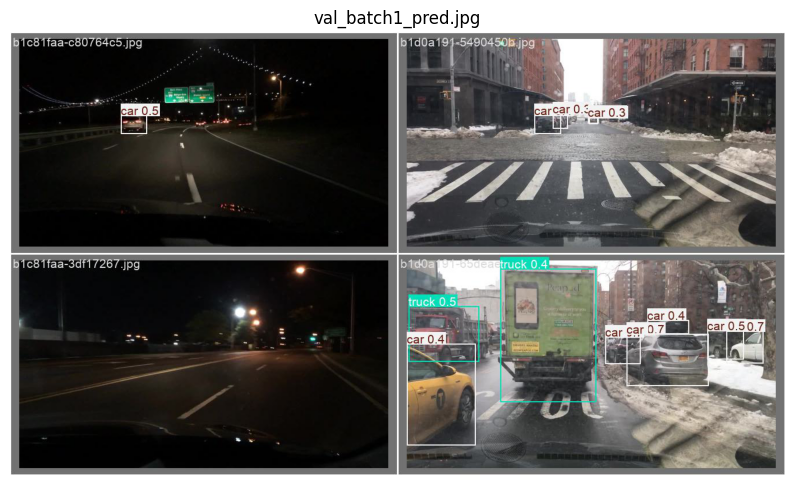

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ensure plots display inline
%matplotlib inline


#Get the directory where the results are saved
results_dir = metrics.save_dir

# List all files in the directory
image_files = [f for f in os.listdir(results_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display all images with their filenames
for image_file in image_files:
    image_path = os.path.join(results_dir, image_file)
    
    # Read and display the image
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)  # Display the filename as the title
    plt.show()